In [1]:
import kagglehub

path = kagglehub.dataset_download("muhammadardiputra/potato-leaf-disease-dataset")
path

'C:\\Users\\lenovo\\.cache\\kagglehub\\datasets\\muhammadardiputra\\potato-leaf-disease-dataset\\versions\\1'

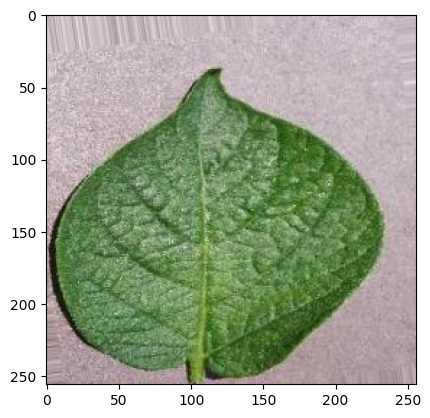

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
path = "Potato\Train\Potato___healthy\Potato_healthy-76-_0_2420.jpg"
img = Image.open(path)
plt.imshow(img)

In [3]:
import os
train_early_blight = os.listdir("Potato/Train/Potato___Early_blight")
train_late_blight = os.listdir("Potato/Train/Potato___Late_blight")
train_healthy = os.listdir("Potato/Train/Potato___healthy")
test_early_blight = os.listdir("Potato/Test/Potato___Early_blight")
test_late_blight = os.listdir("Potato/Test/Potato___Late_blight")
test_healthy = os.listdir("Potato/Test/Potato___healthy")
validation_early_blight = os.listdir("Potato/Valid/Potato___Early_blight")
validation_late_blight = os.listdir("Potato/Valid/Potato___Late_blight")
validation_healthy = os.listdir("Potato/Valid/Potato___healthy")
print("Train Early Blight: ", train_early_blight[0])


Train Early Blight:  b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG


In [7]:
import pandas as pd
import numpy as np

In [12]:
from skimage.feature import hog
hog_features = []
labels = []


for label, image_list, path_prefix in [
    ('Early Blight', train_early_blight, "Potato/Train/Potato___Early_blight/"),
    ('Late Blight', train_late_blight, "Potato/Train/Potato___Late_blight/"),
    ('Healthy', train_healthy, "Potato/Train/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        hog_i = hog_i = hog(
            img_array,
            orientations=9,
            pixels_per_cell=(16, 16),
            cells_per_block=(2, 2),
            block_norm='L2-Hys'
        )
        hog_features.append(hog_i)
        labels.append(label)


hog_data = pd.DataFrame(hog_features)
hog_data['label'] = labels

hog_data.head()

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0.129758,0.074998,0.064456,0.055930,0.101357,0.026267,0.022777,0.029001,0.020187,0.104370,...,0.209731,0.083615,0.086500,0.148348,0.209731,0.095815,0.122089,0.109738,0.096101,Early Blight
1,0.251258,0.108014,0.141299,0.070829,0.155161,0.060166,0.047661,0.035441,0.068272,0.206036,...,0.139636,0.156248,0.094237,0.091061,0.135852,0.111038,0.099364,0.092798,0.117587,Early Blight
2,0.198742,0.150990,0.165417,0.132043,0.214338,0.097937,0.116599,0.139476,0.149846,0.210063,...,0.143082,0.100429,0.131895,0.110166,0.208226,0.129555,0.149070,0.091734,0.113628,Early Blight
3,0.162816,0.164744,0.094420,0.184672,0.211790,0.153193,0.207054,0.106066,0.100436,0.211790,...,0.217137,0.113131,0.132389,0.205946,0.169415,0.156621,0.157295,0.106522,0.110757,Early Blight
4,0.208340,0.095254,0.124778,0.190307,0.208340,0.192960,0.167062,0.169260,0.130857,0.208340,...,0.187754,0.094064,0.118429,0.132170,0.184582,0.124006,0.169894,0.125970,0.189131,Early Blight


In [13]:
hog_data.to_csv("hog_data_train.csv", index=False)

In [14]:
hog_features = []
labels = []


for label, image_list, path_prefix in [
    ('Early Blight', test_early_blight, "Potato/Test/Potato___Early_blight/"),
    ('Late Blight', test_late_blight, "Potato/Test/Potato___Late_blight/"),
    ('Healthy', test_healthy, "Potato/Test/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        hog_i = hog_i = hog(
            img_array,
            orientations=9,
            pixels_per_cell=(16, 16),
            cells_per_block=(2, 2),
            block_norm='L2-Hys'
        )
        hog_features.append(hog_i)
        labels.append(label)


hog_data_test = pd.DataFrame(hog_features)
hog_data_test['label'] = labels

hog_data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0.125138,0.109406,0.115802,0.175668,0.171836,0.072116,0.157540,0.135126,0.109267,0.241987,...,0.191203,0.097368,0.134338,0.160783,0.216527,0.114649,0.098319,0.082303,0.123639,Early Blight
1,0.225457,0.142294,0.114322,0.064089,0.225457,0.106207,0.155027,0.159805,0.096678,0.225457,...,0.191464,0.116423,0.089697,0.127512,0.211762,0.197147,0.105996,0.133266,0.131583,Early Blight
2,0.222385,0.140358,0.143218,0.134701,0.199272,0.078580,0.144615,0.118998,0.155875,0.222385,...,0.223233,0.110460,0.085575,0.095584,0.201159,0.107980,0.067849,0.101812,0.150304,Early Blight
3,0.145856,0.139782,0.153858,0.180793,0.210926,0.115214,0.134288,0.090585,0.091760,0.210926,...,0.159413,0.170445,0.118081,0.116147,0.213857,0.201498,0.145787,0.131370,0.122129,Early Blight
4,0.204015,0.112986,0.100365,0.133846,0.200914,0.112023,0.203371,0.133376,0.159242,0.210521,...,0.207078,0.058307,0.080400,0.135405,0.198154,0.173046,0.137423,0.103920,0.098619,Early Blight


In [15]:
hog_data_test.to_csv("hog_data_test.csv", index=False)

In [16]:
hog_features = []
labels = []


for label, image_list, path_prefix in [
    ('Early Blight', validation_early_blight, "Potato/Valid/Potato___Early_blight/"),
    ('Late Blight', validation_late_blight, "Potato/Valid/Potato___Late_blight/"),
    ('Healthy', validation_healthy, "Potato/Valid/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        hog_i = hog_i = hog(
            img_array,
            orientations=9,
            pixels_per_cell=(16, 16),
            cells_per_block=(2, 2),
            block_norm='L2-Hys'
        )
        hog_features.append(hog_i)
        labels.append(label)


hog_data_valid = pd.DataFrame(hog_features)
hog_data_valid['label'] = labels

hog_data_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0.208274,0.138510,0.097802,0.137258,0.208274,0.208274,0.122194,0.159145,0.129195,0.171077,...,0.104609,0.098755,0.104740,0.191203,0.178210,0.184598,0.126084,0.094418,0.074611,Early Blight
1,0.082298,0.070603,0.087889,0.086561,0.119582,0.066785,0.075297,0.069895,0.052863,0.159157,...,0.187447,0.113631,0.230582,0.163992,0.197566,0.130408,0.123970,0.115300,0.183644,Early Blight
2,0.198878,0.100955,0.172144,0.114316,0.199599,0.160924,0.068413,0.050685,0.066358,0.212518,...,0.172493,0.153259,0.139075,0.130294,0.161930,0.167136,0.155582,0.135797,0.176100,Early Blight
3,0.134050,0.154002,0.177044,0.152092,0.142004,0.107072,0.057734,0.059696,0.086317,0.266887,...,0.206186,0.095054,0.113045,0.272652,0.270374,0.172250,0.059456,0.060035,0.113730,Early Blight
4,0.210267,0.095709,0.162946,0.120089,0.195171,0.119972,0.175406,0.086425,0.096220,0.201809,...,0.206456,0.086827,0.156552,0.128017,0.206456,0.147760,0.131536,0.206456,0.122387,Early Blight


In [17]:
hog_data_valid.to_csv("hog_data_valid.csv", index=False)

Now i m gonna do the same for entropy variation rhythm

In [20]:
from skimage.measure import shannon_entropy
from skimage.util import view_as_blocks

def calculate_entropy_variation_rhythm(image, window_size=8):
    blocks = view_as_blocks(image, block_shape=(window_size, window_size))
    entropy_map = np.zeros(blocks.shape[:2])

    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            entropy_map[i, j] = shannon_entropy(blocks[i, j])
    
    return entropy_map
    


In [22]:
evr_features = []
labels = []


for label, image_list, path_prefix in [
    ('Early Blight', train_early_blight, "Potato/Train/Potato___Early_blight/"),
    ('Late Blight', train_late_blight, "Potato/Train/Potato___Late_blight/"),
    ('Healthy', train_healthy, "Potato/Train/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        evr_i = calculate_entropy_variation_rhythm(img_array)
        evr_features.append(evr_i.flatten())
        labels.append(label)


evr_data_train = pd.DataFrame(evr_features)
evr_data_train['label'] = labels

evr_data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,3.744753,3.554383,3.946874,3.107321,3.277967,3.545055,3.385934,3.485894,3.140311,3.331204,...,5.085479,5.208919,5.021419,4.823684,5.070563,4.897979,5.128524,4.984070,5.003524,Early Blight
1,2.799300,3.062717,3.454173,3.406109,3.267798,2.694662,3.520308,3.188100,3.554022,3.354269,...,4.896419,5.075605,5.527115,5.363205,2.516127,5.234070,4.574994,4.383467,4.579784,Early Blight
2,3.756296,4.118693,3.684468,3.667295,3.858569,4.171723,3.681304,3.841328,3.568142,3.867789,...,3.597831,4.008720,5.097274,5.089615,4.866479,4.737594,4.628274,4.370111,4.673534,Early Blight
3,3.875807,3.850909,4.033259,4.141127,4.347678,3.984877,4.272729,4.142687,4.608819,4.628928,...,5.195160,5.226410,5.179229,5.128524,4.965018,4.952820,5.195160,4.896419,4.915874,Early Blight
4,4.316832,4.710883,4.698684,4.671973,4.813810,4.554633,4.886184,5.140320,4.819549,4.893844,...,5.452820,5.425705,5.445160,5.495865,5.245865,5.378524,5.402115,5.370865,5.253524,Early Blight


In [23]:
evr_data_train.to_csv("evr_data_train",index=False)

In [24]:
evr_features = []
labels = []


for label, image_list, path_prefix in [
    ('Early Blight', test_early_blight, "Potato/Test/Potato___Early_blight/"),
    ('Late Blight', test_late_blight, "Potato/Test/Potato___Late_blight/"),
    ('Healthy', test_healthy, "Potato/Test/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        evr_i = calculate_entropy_variation_rhythm(img_array)
        evr_features.append(evr_i.flatten())
        labels.append(label)


evr_data_test = pd.DataFrame(evr_features)
evr_data_test['label'] = labels

evr_data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,4.659524,4.845714,4.886184,4.633970,4.831344,5.146419,5.083919,5.229934,5.370865,5.308365,...,5.280639,5.277115,5.488205,5.476410,5.421570,5.202820,5.238205,5.359070,5.120865,Early Blight
1,3.783618,3.461832,3.658913,3.824744,3.528642,3.884777,3.777857,3.694568,3.799954,3.359290,...,4.386588,4.265473,4.075648,4.772979,4.527518,4.202066,4.380195,4.340018,4.472678,Early Blight
2,3.752913,4.009777,3.887395,4.094810,3.549954,3.589157,3.581901,3.398536,4.008720,3.398789,...,5.277115,5.581955,5.625000,4.917434,4.915874,5.370865,5.015320,5.034774,4.929229,Early Blight
3,3.432773,4.083669,4.536738,4.111690,4.378928,3.856058,4.031470,3.998636,4.003317,3.987202,...,5.593750,5.202820,5.116729,5.515320,5.245865,5.213054,5.158214,5.338054,5.546570,Early Blight
4,5.277115,4.609473,5.054229,5.134624,5.072124,5.245865,5.277115,5.464615,5.538910,5.570160,...,5.272979,4.864515,5.320160,5.042434,4.736034,4.608819,4.333669,4.445313,4.105699,Early Blight


In [25]:
evr_data_test.to_csv("evr_data_test.csv",index=False)

In [27]:
evr_features = []
labels = []


for label, image_list, path_prefix in [
    ('Early Blight', validation_early_blight, "Potato/Valid/Potato___Early_blight/"),
    ('Late Blight', validation_late_blight, "Potato/Valid/Potato___Late_blight/"),
    ('Healthy', validation_healthy, "Potato/Valid/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        evr_i = calculate_entropy_variation_rhythm(img_array)
        evr_features.append(evr_i.flatten())
        labels.append(label)


evr_data_valid = pd.DataFrame(evr_features)
evr_data_valid['label'] = labels

evr_data_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,5.054229,5.202820,5.152115,5.167434,5.183365,5.370865,5.339615,5.213054,5.167434,5.613205,...,5.136184,5.331955,5.245865,5.421570,4.854934,4.914313,4.984070,4.477217,4.984070,Early Blight
1,4.565774,3.928979,3.905432,4.679633,5.202820,5.550705,5.402115,5.253524,5.234070,4.715018,...,5.378524,5.370865,5.507660,5.581955,5.366729,5.394455,5.433365,5.484070,5.120865,Early Blight
2,3.410942,3.014521,3.567738,4.086790,3.394608,3.848988,3.631003,3.460633,3.314122,3.733862,...,5.075605,5.308365,5.244304,5.077820,5.202820,5.296570,5.327820,5.394455,5.220714,Early Blight
3,4.184172,4.023787,3.970464,4.223082,4.616729,4.970714,3.876060,4.234473,4.323073,4.405389,...,4.671973,4.853374,4.976813,5.474849,5.538910,4.808365,4.665874,4.489515,4.364515,Early Blight
4,4.429633,4.804229,4.878928,4.817988,4.886184,4.742133,4.972274,5.089615,5.064464,5.030639,...,5.472274,5.421570,5.277115,5.484070,5.339615,5.382660,5.445160,5.425705,5.464615,Early Blight


In [28]:
evr_data_valid.to_csv("evr_data_valid.csv",index=False)

time for the convex ratio wich is the area of the object / area of the convex hull

In [29]:
from skimage.morphology import convex_hull_image
from skimage.measure import regionprops
from skimage import filters

def calculate_ch(image):
    threshhold = filters.threshold_otsu(image)
    bin_image = image > threshhold

    props = regionprops(bin_image.astype(int))

    convex_rat = []

    for prop in props:
        cov = convex_hull_image(prop.image)
        oba = prop.area
        h_a = np.sum(cov)

        if(h_a >0):
            convex_rat.append(oba / h_a)
    
    return np.mean(convex_rat) if convex_rat else 0

In [30]:
labels = []
cr = []

for label, image_list, path_prefix in [
    ('Early Blight', validation_early_blight, "Potato/Valid/Potato___Early_blight/"),
    ('Late Blight', validation_late_blight, "Potato/Valid/Potato___Late_blight/"),
    ('Healthy', validation_healthy, "Potato/Valid/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        cr.append(calculate_ch(img_array))
        labels.append(label)

cr_data_validation = pd.DataFrame()
cr_data_validation["CR"] = cr
cr_data_validation["label"] = labels

cr_data_validation.head()

,CR,label
0,0.765411,Early Blight
1,0.735077,Early Blight
2,0.781342,Early Blight
3,0.710724,Early Blight
4,0.659119,Early Blight


In [32]:
cr_data_validation.to_csv("cr_data_validation", index=False)

In [33]:
labels = []
cr = []

for label, image_list, path_prefix in [
    ('Early Blight', test_early_blight, "Potato/Test/Potato___Early_blight/"),
    ('Late Blight', test_late_blight, "Potato/Test/Potato___Late_blight/"),
    ('Healthy', test_healthy, "Potato/Test/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        cr.append(calculate_ch(img_array))
        labels.append(label)

cr_data_test = pd.DataFrame()
cr_data_test["CR"] = cr
cr_data_test["label"] = labels

cr_data_test.head()

,CR,label
0,0.756744,Early Blight
1,0.844070,Early Blight
2,0.671555,Early Blight
3,0.731483,Early Blight
4,0.697800,Early Blight


In [34]:
cr_data_test.to_csv("cr_data_test", index=False)

In [35]:
labels = []
cr = []

for label, image_list, path_prefix in [
    ('Early Blight', train_early_blight, "Potato/Train/Potato___Early_blight/"),
    ('Late Blight', train_late_blight, "Potato/Train/Potato___Late_blight/"),
    ('Healthy', train_healthy, "Potato/Train/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path).convert('L'))
        cr.append(calculate_ch(img_array))
        labels.append(label)

cr_data_train = pd.DataFrame()
cr_data_train["CR"] = cr
cr_data_train["label"] = labels

cr_data_train.head()

,CR,label
0,0.650345,Early Blight
1,0.879105,Early Blight
2,0.788361,Early Blight
3,0.423823,Early Blight
4,0.758972,Early Blight


In [36]:
cr_data_train.to_csv("cr_data_train",index=False)

last and not least the mean and std of the rgb chennels

In [37]:
def calcul_dev(img):
    std_red = np.std(img[:,:,0])
    std_blue = np.std(img[:,:,2])
    std_green = np.std(img[:,:,1])
    mean_red = np.mean(img[:,:,0])
    mean_blue = np.mean(img[:,:,2])
    mean_green = np.mean(img[:,:,1])
    return std_red,std_green,std_blue,mean_red,mean_green,mean_blue

In [38]:
labels = []
std_reds = []
std_greens = []
std_blues = []
mean_reds = []
mean_greens = []
mean_blues = []

for label, image_list, path_prefix in [
    ('Early Blight', train_early_blight, "Potato/Train/Potato___Early_blight/"),
    ('Late Blight', train_late_blight, "Potato/Train/Potato___Late_blight/"),
    ('Healthy', train_healthy, "Potato/Train/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path))  
        std_red, std_green, std_blue, mean_red, mean_green, mean_blue = calcul_dev(img_array) 
        
        
        std_reds.append(std_red)
        std_greens.append(std_green)
        std_blues.append(std_blue)
        mean_reds.append(mean_red)
        mean_greens.append(mean_green)
        mean_blues.append(mean_blue)
        labels.append(label)


rgb_data_train = pd.DataFrame({
    'std_red': std_reds,
    'std_green': std_greens,
    'std_blue': std_blues,
    'mean_red': mean_reds,
    'mean_green': mean_greens,
    'mean_blue': mean_blues,
    'label': labels
})


rgb_data_train.head()


,std_red,std_green,std_blue,mean_red,mean_green,mean_blue,label
0,49.402135,44.681631,56.761742,130.457794,141.475143,123.328873,Early Blight
1,41.371080,43.703033,53.630966,157.621521,155.074310,116.668076,Early Blight
2,54.756608,55.326779,60.766907,154.322906,143.366653,105.080841,Early Blight
3,37.288301,33.208556,46.281276,97.784882,115.525192,107.374161,Early Blight
4,46.381312,42.903007,56.167650,131.403397,145.426712,119.874054,Early Blight


In [39]:
rgb_data_train.to_csv("rgb_data_train.csv", index=False)

In [40]:
labels = []
std_reds = []
std_greens = []
std_blues = []
mean_reds = []
mean_greens = []
mean_blues = []

for label, image_list, path_prefix in [
    ('Early Blight', test_early_blight, "Potato/Test/Potato___Early_blight/"),
    ('Late Blight', test_late_blight, "Potato/Test/Potato___Late_blight/"),
    ('Healthy', test_healthy, "Potato/Test/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path))  
        std_red, std_green, std_blue, mean_red, mean_green, mean_blue = calcul_dev(img_array) 
        
        
        std_reds.append(std_red)
        std_greens.append(std_green)
        std_blues.append(std_blue)
        mean_reds.append(mean_red)
        mean_greens.append(mean_green)
        mean_blues.append(mean_blue)
        labels.append(label)


rgb_data_test = pd.DataFrame({
    'std_red': std_reds,
    'std_green': std_greens,
    'std_blue': std_blues,
    'mean_red': mean_reds,
    'mean_green': mean_greens,
    'mean_blue': mean_blues,
    'label': labels
})


rgb_data_test.head()

,std_red,std_green,std_blue,mean_red,mean_green,mean_blue,label
0,54.927770,55.002191,66.693574,133.532394,138.186935,117.071976,Early Blight
1,37.149404,38.444980,53.095798,164.524124,155.039444,119.035934,Early Blight
2,53.849758,50.067582,67.512727,137.255859,143.256851,124.644516,Early Blight
3,47.439247,47.604237,59.571320,144.293762,142.490250,106.417053,Early Blight
4,55.686058,57.958730,63.956275,131.576828,125.367538,97.629654,Early Blight


In [41]:
rgb_data_test.to_csv("rgb_data_test.csv", index=False)

In [42]:
labels = []
std_reds = []
std_greens = []
std_blues = []
mean_reds = []
mean_greens = []
mean_blues = []

for label, image_list, path_prefix in [
    ('Early Blight', validation_early_blight, "Potato/Valid/Potato___Early_blight/"),
    ('Late Blight', validation_late_blight, "Potato/Valid/Potato___Late_blight/"),
    ('Healthy', validation_healthy, "Potato/Valid/Potato___Healthy/")
]:
    for img in image_list:
        path = path_prefix + img
        img_array = np.array(Image.open(path))  
        std_red, std_green, std_blue, mean_red, mean_green, mean_blue = calcul_dev(img_array) 
        
        
        std_reds.append(std_red)
        std_greens.append(std_green)
        std_blues.append(std_blue)
        mean_reds.append(mean_red)
        mean_greens.append(mean_green)
        mean_blues.append(mean_blue)
        labels.append(label)


rgb_data_validation = pd.DataFrame({
    'std_red': std_reds,
    'std_green': std_greens,
    'std_blue': std_blues,
    'mean_red': mean_reds,
    'mean_green': mean_greens,
    'mean_blue': mean_blues,
    'label': labels
})


rgb_data_validation.head()

,std_red,std_green,std_blue,mean_red,mean_green,mean_blue,label
0,52.725738,52.850016,61.169394,132.898743,136.093613,106.074203,Early Blight
1,62.662330,64.261652,66.424869,140.445389,138.235992,102.567383,Early Blight
2,51.191296,54.016546,60.809305,149.104996,150.238876,118.294937,Early Blight
3,50.232786,51.719000,58.723900,134.315353,133.756943,108.450684,Early Blight
4,57.791839,55.954682,68.567671,121.469315,132.116348,106.724060,Early Blight


In [43]:
rgb_data_validation.to_csv("rgb_data_validation.csv", index=False)